#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from tensorflow.keras import utils
y_label_train_OneHot = utils.to_categorical(y_label_train)
y_label_test_OneHot = utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [19]:
model.save_weights("cifarCnnModel.h5")

# 訓練模型

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

## use "MSE"

In [22]:
try:
    model.load_weights("cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


In [23]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [24]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 18s 468us/sample - loss: 0.0907 - accuracy: 0.1113 - val_loss: 0.0897 - val_accuracy: 0.1613
Epoch 2/12
37500/37500 [==============================] - 16s 416us/sample - loss: 0.0901 - accuracy: 0.1209 - val_loss: 0.0896 - val_accuracy: 0.1797
Epoch 3/12
37500/37500 [==============================] - 16s 417us/sample - loss: 0.0899 - accuracy: 0.1284 - val_loss: 0.0894 - val_accuracy: 0.1885
Epoch 4/12
37500/37500 [==============================] - 15s 412us/sample - loss: 0.0896 - accuracy: 0.1401 - val_loss: 0.0893 - val_accuracy: 0.1941
Epoch 5/12
37500/37500 [==============================] - 16s 414us/sample - loss: 0.0895 - accuracy: 0.1419 - val_loss: 0.0892 - val_accuracy: 0.2000
Epoch 6/12
37500/37500 [==============================] - 16s 414us/sample - loss: 0.0893 - accuracy: 0.1507 - val_loss: 0.0891 - val_accuracy: 0.2016
Epoch 7/12
37500/37500 [====================

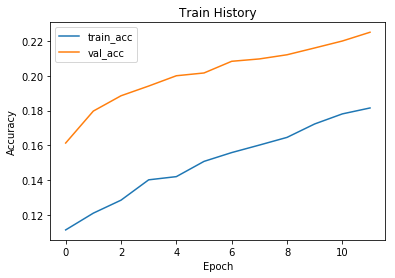

In [25]:
show_train_history('accuracy','val_accuracy')

## use "binary_crossentropy"

In [26]:
try:
    model.load_weights("cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


In [27]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

W0705 15:12:41.802490  9688 deprecation.py:323] From c:\users\qwerz\miniconda3\envs\ml100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 22s 574us/sample - loss: 0.3246 - accuracy: 0.9000 - val_loss: 0.3210 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 21s 560us/sample - loss: 0.3194 - accuracy: 0.9000 - val_loss: 0.3182 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 21s 559us/sample - loss: 0.3150 - accuracy: 0.9000 - val_loss: 0.3146 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 21s 561us/sample - loss: 0.3097 - accuracy: 0.9000 - val_loss: 0.3099 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 21s 559us/sample - loss: 0.3036 - accuracy: 0.9000 - val_loss: 0.3050 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 21s 559us/sample - loss: 0.2982 - accuracy: 0.9001 - val_loss: 0.3003 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [====================

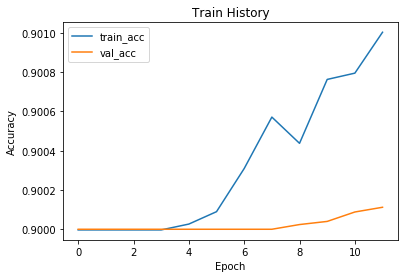

In [29]:
show_train_history('accuracy','val_accuracy')